In [7]:
from rosbags.highlevel import AnyReader
from rosbags.typesys import Stores, get_typestore
from pathlib import Path
from glob import glob

import numpy as np
import matplotlib.pyplot as plt

In [19]:
data = []
timestamps = []

BAG_PATH = glob("../bags/*")[0]
path = Path(BAG_PATH)

typestore = get_typestore(Stores.ROS2_HUMBLE)
with AnyReader([path], default_typestore=typestore) as reader:
    connections = [x for x in reader.connections if x.topic == '/output/lean_angle']
    for connection, timestamp, rawdata in reader.messages(connections=connections):
        msg = reader.deserialize(rawdata, connection.msgtype)
        timestamps.append(timestamp)
        data.append(msg.data)

data = np.array(data)
timestamps = np.array(timestamps)

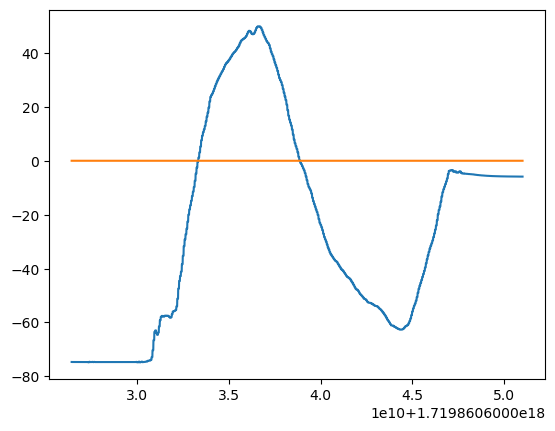

In [20]:
setpoint = 0
setpoint_array = np.ones(data.shape) * setpoint

plt.plot(timestamps, data)
plt.plot(timestamps, setpoint_array)